In [23]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from Utils import *
from Models import *

In [76]:
filename = "/work/data/logs/new/aae_m1_200M_QQ_ml15_limit1_2018_09_01_02:08:34.res"
df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
# df2 = pd.read_csv(filename.replace(".res", ".semi_model.csv"), header=None, sep=",")
df3 = pd.read_csv(filename.replace(".res", ".model.csv"), header=0, sep=";")

In [77]:
df

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,aae,136.7s,40000,10.4280,0.5016,0.8387,0.4751,0.7060,0.9230,0.3360
1,aae,129.9s,80000,6.9672,0.5029,0.8419,0.4865,0.7154,0.9343,0.4527
2,aae,130.1s,120000,5.6680,0.5042,0.8426,0.4920,0.7175,0.9356,0.4563
3,aae,132.1s,160000,4.6303,0.5043,0.8428,0.4997,0.7150,0.9347,0.4771
4,aae,131.1s,200000,3.8981,0.5040,0.8426,0.4949,0.7186,0.9323,0.4920
5,aae,131.5s,240000,3.3119,0.5017,0.8426,0.4975,0.7189,0.9308,0.4922
6,aae,133.6s,280000,3.2615,0.5013,0.8420,0.4971,0.7240,0.9292,0.4932
7,aae,146.3s,320000,2.8443,0.5010,0.8426,0.4901,0.7246,0.9289,0.5056
8,aae,135.3s,360000,2.5746,0.5001,0.8417,0.4967,0.7255,0.9267,0.4880
9,aae,134.0s,400000,2.2215,0.4998,0.8421,0.4988,0.7246,0.9288,0.4936


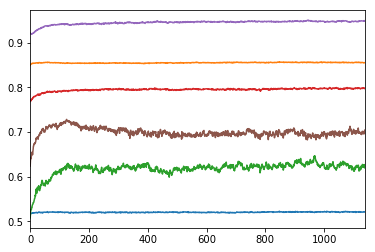

In [66]:
for i in ["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"]:
    df[i].plot()

In [93]:
filename = "/work/data/logs/new/all/aae_s2s_m1_200M_QQ_ml15_limit1_2018_09_01_16:12:08.res"
df2 = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])


In [368]:
def read(filename, limit=None):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
    if limit != None:
        return df[:limit].to_dict()
    return df.to_dict()
def read2(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "val_loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
    return df.to_dict()
def read_df(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
    return df
def read_df2(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "val_loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
    return df

In [246]:
def visualise(results, focus=["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"], legends=None, save=None, earlyStop=None):
    
    width = 18
    height = 2
    
    plt.figure(figsize=(width, height))
    
    plt_num = len(focus)
    
    for i in range(plt_num):
        plt.subplot(1, plt_num, i+1)
        
        for r in results:
            if earlyStop != None:
                plt.plot([(i+1) for i in range(earlyStop)], r[1][focus[i]][:earlyStop])
            else:
                plt.plot([(i+1) for i in range(len(r[focus[i]]))], list(r[focus[i]].values()))
                
        plt.title(focus[i])
        plt.xlabel('Iterations')
        
        

    if legends == None:
        plt.legend([i["model"][0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left")
    else:
        plt.legend([i for i in legends],bbox_to_anchor=(1.04,1), loc="upper left")


    plt.subplots_adjust(wspace=0.3)
    if save != None:
        plt.savefig('/work/png/%s' %save, bbox_inches='tight',pad_inches=1, dpi=300)
    plt.show()

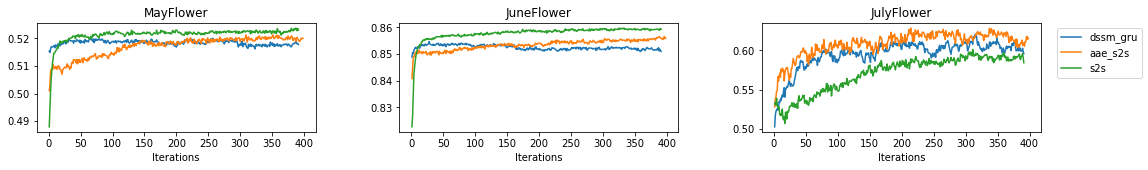

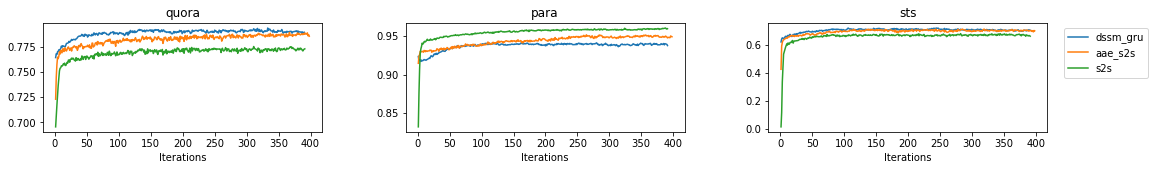

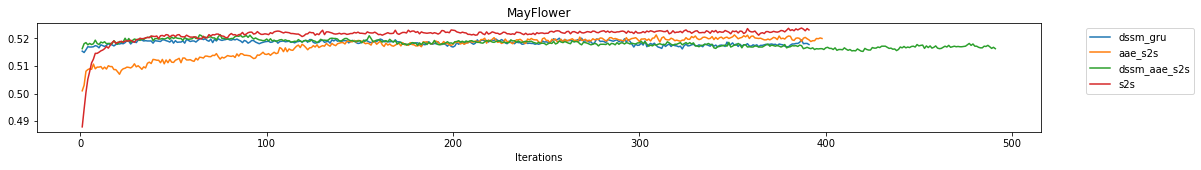

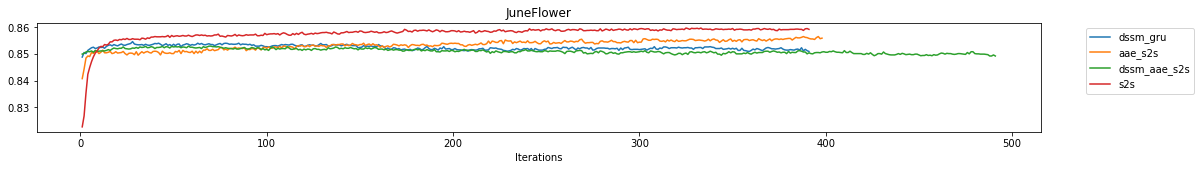

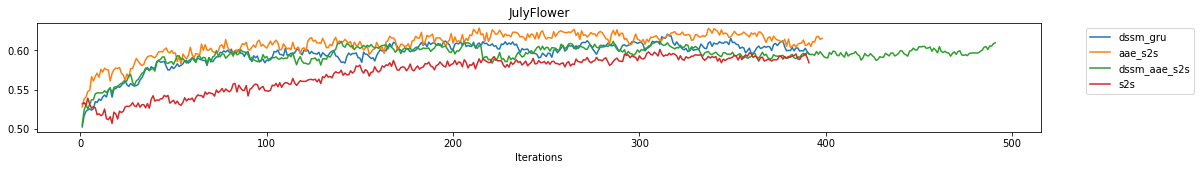

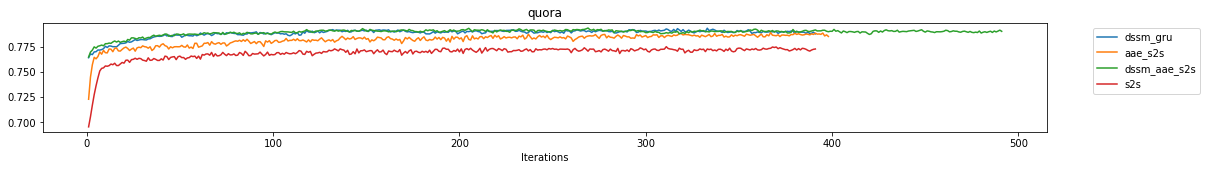

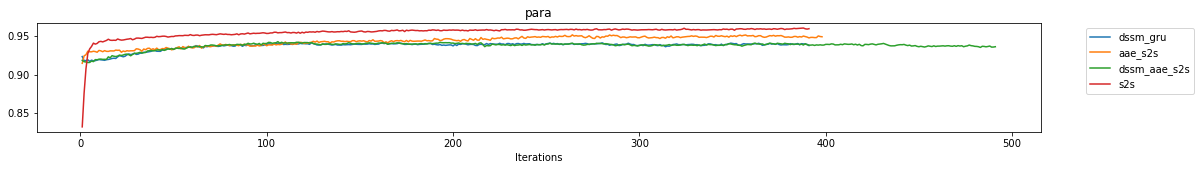

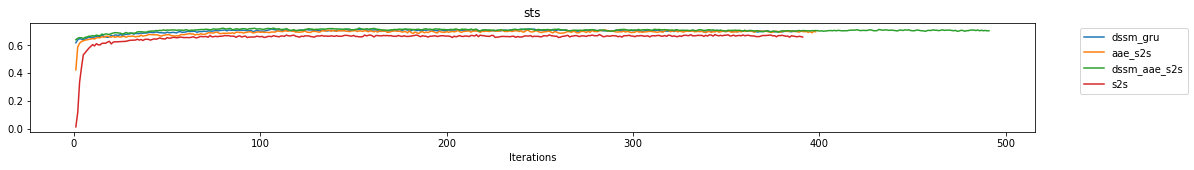

In [441]:
run1 = read("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit1_2018_09_01_16:37:29.res")
run2 = read("/work/data/logs/new/all/aae_s2s_m1_200M_QQ_ml15_limit1_2018_09_01_16:12:08.res")
run3 = read("/work/data/logs/new/all/dssm_aae_s2s_m1_200M_QQ_ml15_limit1_2018_09_01_17:27:19.res")
run4 = read("/work/data/logs/new/all/s2s_m1_200M_QQ_ml15_limit1_2018_09_01_17:18:07.res")
# visualise([run1, run2, run4])

visualise([run1, run2, run4], focus=["MayFlower", "JuneFlower", "JulyFlower"])
visualise([run1, run2, run4], focus=["quora", "para", "sts"])

# column = "JulyFlower"
# ax = run1[column].plot()
# run2[column].plot(ax=ax)
# run3[column].plot(ax=ax)
# run4[column].plot(ax=ax)

for i in ["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"]:
    visualise([run1, run2, run3, run4], focus=[i])


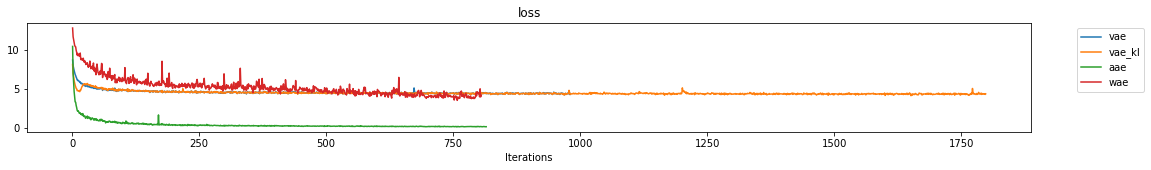

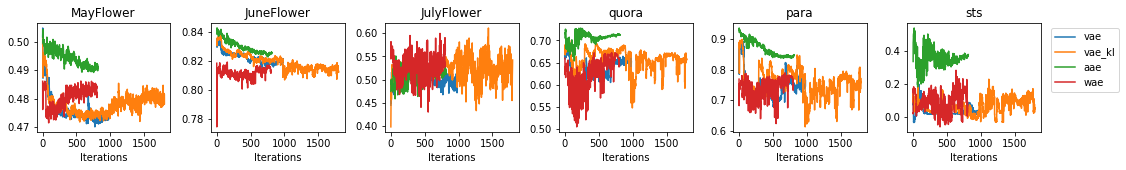

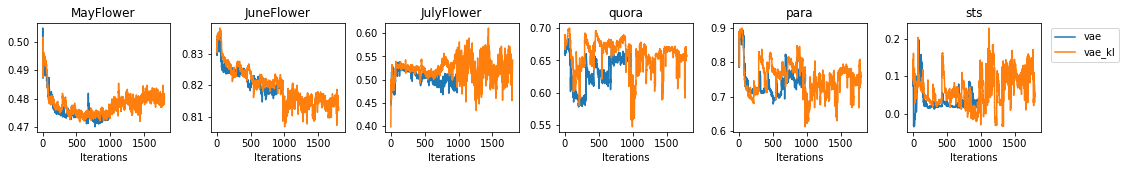

In [446]:

# 50M
aae = read("/work/data/logs/new/aae_m1_200M_QQ_ml15_limit1_2018_09_01_02:08:34.res")
vae = read("/work/data/logs/new/vae_m1_200M_QQ_ml15_limit1_2018_09_01_02:22:16.res")
vae_kl = read("/work/data/logs/new/vae_kl_m1_200M_QQ_ml15_limit1_2018_09_01_02:31:47.res")
wae = read("/work/data/logs/new/wae_m1_200M_QQ_ml15_limit1_2018_09_01_02:22:09.res")
kate = read("/work/data/logs/new/all/kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_03:10:46.res")
# vae_bow = read("/work/data/logs/new/all/vae_bo")
visualise([vae, vae_kl, aae, wae], focus=["loss"])
visualise([vae, vae_kl, aae, wae])
visualise([vae, vae_kl])



In [ ]:
"/work/data/logs/new/aae_m1_200M_QQ_ml15_limit1_2018_09_01_02:08:34.encoder.h5"

In [352]:
vae_df = read_df("/work/data/logs/new/vae_m1_200M_QQ_ml15_limit1_2018_09_01_02:22:16.res")

In [353]:
vae_df

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,vae,98.2s,40000,8.6737,0.5020,0.8320,0.4453,0.6731,0.8741,0.0749
1,vae,93.9s,80000,7.9692,0.5048,0.8344,0.4725,0.6779,0.8856,0.1412
2,vae,105.7s,120000,7.6277,0.4993,0.8321,0.4492,0.6650,0.8393,0.1062
3,vae,94.6s,160000,7.3316,0.4945,0.8300,0.4993,0.6577,0.7846,0.0817
4,vae,92.5s,200000,7.0482,0.4882,0.8295,0.4963,0.6622,0.8035,0.0230
5,vae,94.8s,240000,6.8268,0.4872,0.8321,0.4816,0.6618,0.8520,-0.0008
6,vae,98.5s,280000,6.6844,0.4898,0.8333,0.4548,0.6656,0.8777,-0.0183
7,vae,95.5s,320000,6.4843,0.4895,0.8337,0.4674,0.6614,0.8737,-0.0324
8,vae,96.1s,360000,6.3381,0.4882,0.8330,0.4856,0.6630,0.8759,-0.0246
9,vae,98.9s,400000,6.1232,0.4900,0.8348,0.4865,0.6619,0.8718,-0.0255


# 100M QQ Experiment on Supervised Models

In [431]:
dssm_pra

{'JulyFlower': {0: 0.5075, 1: 0.5061, 2: 0.4897},
 'JuneFlower': {0: 0.8193, 1: 0.8177, 2: 0.8149},
 'MayFlower': {0: 0.4877, 1: 0.483, 2: 0.4832},
 'iter': {0: 25600, 1: 51200, 2: 76800},
 'loss': {0: 1.5684, 1: 1.4863, 2: 1.4276},
 'model': {0: 'dssm_pra', 1: 'dssm_pra', 2: 'dssm_pra'},
 'para': {0: 0.7672, 1: 0.7591, 2: 0.7617},
 'quora': {0: 0.6295, 1: 0.6215, 2: 0.6411},
 'sts': {0: 0.0105, 1: 0.0329, 2: 0.0258},
 'time': {0: '124.3s', 1: '112.7s', 2: '108.7s'}}

In [452]:
# 100M
dssm = read("/work/data/logs/dssm_gru_m1_200M_QQ_ml15_limit1_2018_08_30_20:36:22.res", int(100000000/512))
s2s = read("/work/data/logs/s2s_m1_200M_QQ_ml15_limit1_2018_08_30_20:37:31.res", int(100000000/512))
dssm_aae = read("/work/data/logs/dssm_aae_m1_200M_QQ_ml15_limit102400_2018_08_31_02:32:31.res", int(100000000/512))
dssm_wae = read("/work/data/logs/dssm_wae_m1_200M_QQ_ml15_limit1_2018_08_31_02:59:46.res", int(100000000/512))
dssm_vae_kl = read("/work/data/logs/dssm_vae_kl_m1_200M_QQ_ml15_limit1_2018_08_31_02:44:20.res", int(100000000/512))
dssm_pra = read("/work/data/logs/dssm_pra_m1_200M_QQ_ml15_limit1_2018_08_31_17:05:16.res")

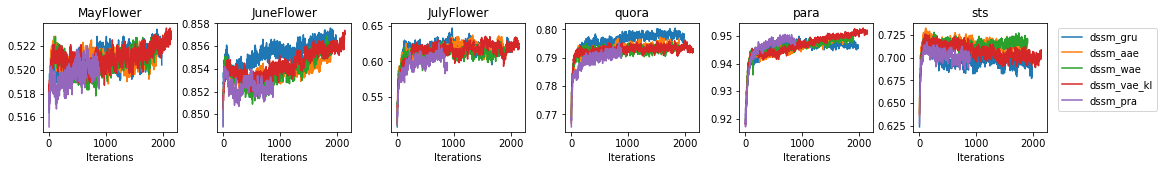

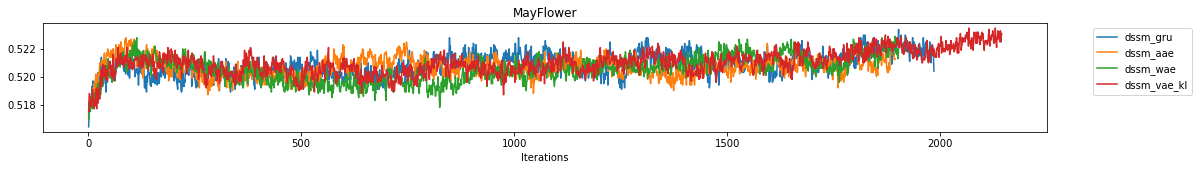

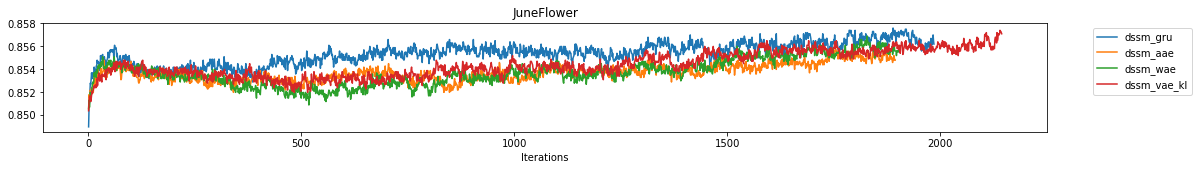

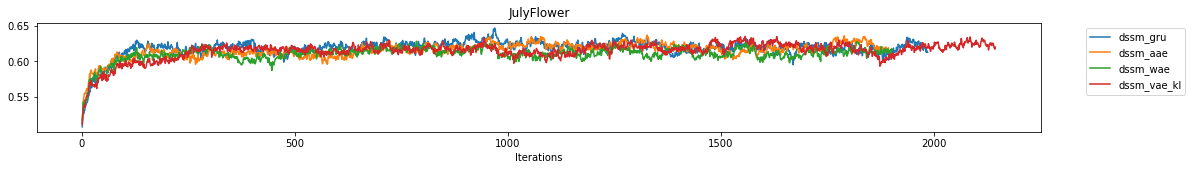

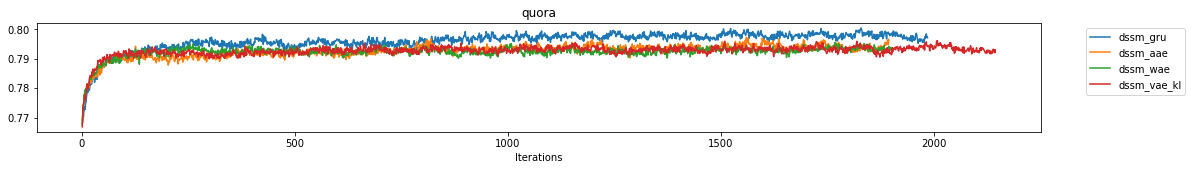

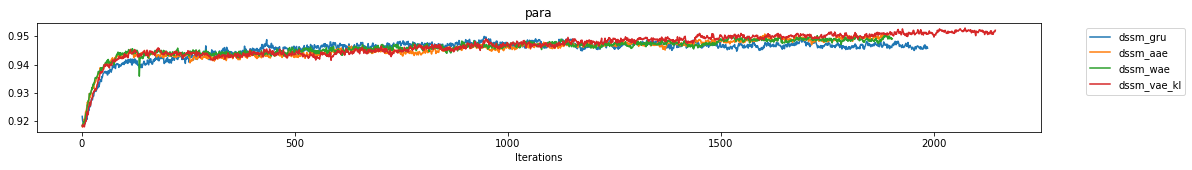

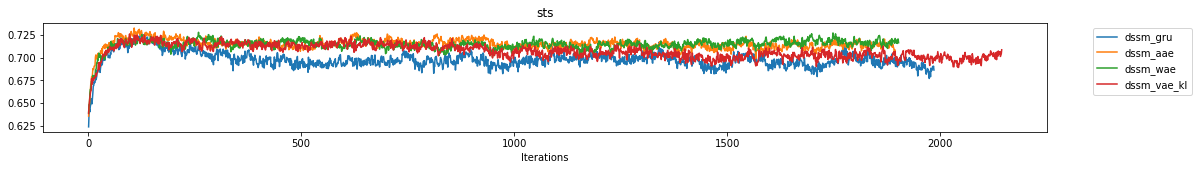

In [454]:
visualise([dssm, dssm_aae, dssm_wae, dssm_vae_kl, dssm_pra])

for i in ["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"]:
    visualise([dssm, dssm_aae, dssm_wae, dssm_vae_kl], focus=[i])

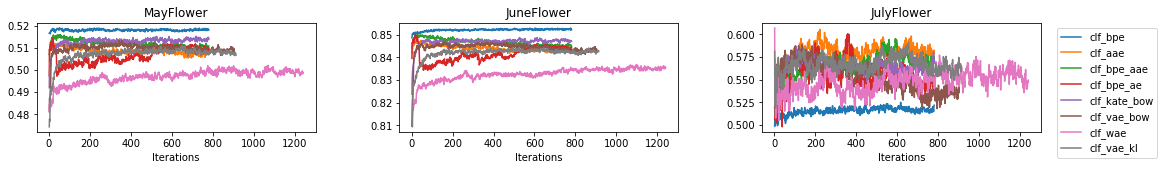

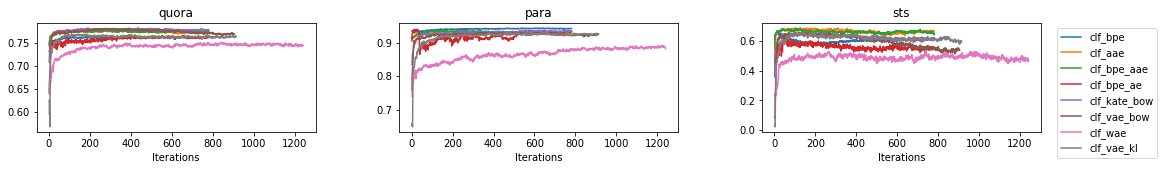

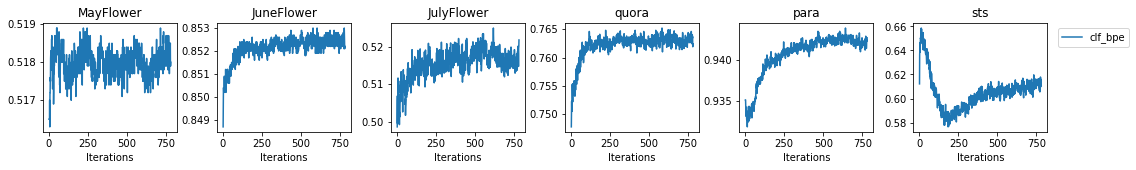

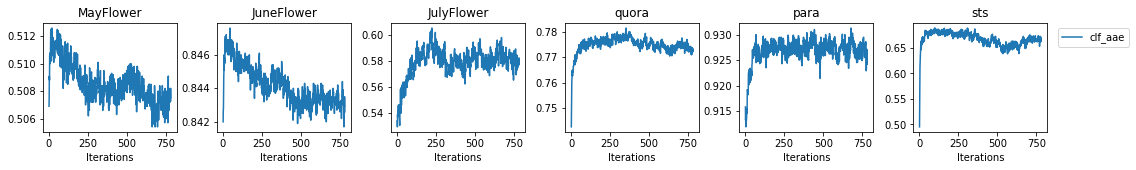

In [455]:
# CLF 20M
clf_bpe_vae_kl = read("/work/data/logs/new/all/clf_bpe_ae_m1_200M_QQ_ml15_limit1_2018_09_02_03:37:31.res", int(20000000/25600))
clf_bpe = read("/work/data/logs/new/all/clf_bpe_m1_200M_QQ_ml15_limit1_2018_09_02_03:36:47.res", int(20000000/25600))
dssm = read("/work/data/logs/dssm_gru_m1_200M_QQ_ml15_limit1_2018_08_30_20:36:22.res", int(20000000/25600))

clf_aae = read("/work/data/logs/new/all/clf_aae_m1_200M_QQ_ml15_limit1_2018_09_02_03:47:36.res", int(20000000/25600))
clf_bpe_aae = read("/work/data/logs/new/all/clf_bpe_aae_m1_200M_QQ_ml15_limit1_2018_09_02_03:49:24.res", int(20000000/25600))
clf_kate_bow = read("/work/data/logs/new/all/clf_kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_12:07:54.res", int(20000000/25600))

clf_vae_bow = read("/work/data/logs/new/all/clf_vae_bow_m1_200M_QQ_ml15_limit1_2018_09_02_20:57:42.res")
clf_wae = read("/work/data/logs/new/all/clf_wae_m1_200M_QQ_ml15_limit1_2018_09_02_20:58:33.res")
clf_vae_kl = read("/work/data/logs/new/all/clf_vae_kl_m1_200M_QQ_ml15_limit1_2018_09_02_21:08:19.res")


visualise([clf_bpe, clf_aae, clf_bpe_aae, clf_bpe_vae_kl, clf_kate_bow, clf_vae_bow, clf_wae, clf_vae_kl], focus=["MayFlower", "JuneFlower", "JulyFlower"])
visualise([clf_bpe, clf_aae, clf_bpe_aae, clf_bpe_vae_kl, clf_kate_bow, clf_vae_bow, clf_wae, clf_vae_kl], focus=["quora", "para", "sts"])
visualise([clf_bpe])
visualise([clf_aae])

In [459]:
df = read_df("/work/data/logs/new/all/clf_aae_m1_200M_QQ_ml15_limit1_2018_09_02_03:47:36.res")


In [460]:
df

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,clf_aae,67.9s,25600,0.6029,0.5069,0.8420,0.5340,0.7426,0.9158,0.4952
1,clf_aae,54.8s,51200,0.5694,0.5076,0.8427,0.5295,0.7500,0.9132,0.5443
2,clf_aae,55.2s,76800,0.5451,0.5091,0.8428,0.5390,0.7556,0.9139,0.5910
3,clf_aae,58.7s,102400,0.5429,0.5088,0.8438,0.5371,0.7600,0.9119,0.6132
4,clf_aae,59.6s,128000,0.5104,0.5106,0.8447,0.5419,0.7616,0.9144,0.6235
5,clf_aae,54.7s,153600,0.5058,0.5102,0.8450,0.5399,0.7630,0.9123,0.6395
6,clf_aae,54.0s,179200,0.4970,0.5100,0.8460,0.5395,0.7648,0.9132,0.6385
7,clf_aae,54.2s,204800,0.5108,0.5105,0.8451,0.5460,0.7633,0.9133,0.6484
8,clf_aae,51.0s,230400,0.4960,0.5108,0.8458,0.5390,0.7626,0.9141,0.6563
9,clf_aae,53.5s,256000,0.4999,0.5106,0.8458,0.5411,0.7647,0.9155,0.6574


In [400]:
df = read_df("/work/data/logs/new/all/vae_bow_m1_200M_QQ_ml15_limit1_2018_09_02_02:03:04.res")
df = read_df("/work/data/logs/new/all/kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_03:10:46.res")

In [401]:
df

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,kate_bow,76.3s,25600,14.9298,0.5104,0.8431,0.4951,0.7522,0.9240,0.5742
1,kate_bow,74.0s,51200,14.0474,0.5091,0.8420,0.4905,0.7514,0.9279,0.5422
2,kate_bow,79.2s,76800,8.1945,0.5053,0.8362,0.5046,0.7385,0.8998,0.4820
3,kate_bow,59.0s,102400,7.9894,0.5012,0.8332,0.5203,0.7324,0.8783,0.4811
4,kate_bow,67.7s,128000,4.3492,0.5008,0.8318,0.5115,0.7263,0.8634,0.4645
5,kate_bow,66.8s,153600,8.3031,0.5002,0.8319,0.5428,0.7305,0.8640,0.4532
6,kate_bow,62.7s,179200,6.7622,0.4982,0.8291,0.5430,0.7179,0.8562,0.4180
7,kate_bow,79.2s,204800,6.5836,0.4976,0.8290,0.5512,0.7173,0.8483,0.4416
8,kate_bow,69.8s,230400,5.7932,0.4972,0.8280,0.5511,0.7165,0.8488,0.4206
9,kate_bow,61.2s,256000,6.4122,0.4958,0.8256,0.5497,0.7072,0.8387,0.4017


In [161]:
def read_model(filename):
    return pd.read_csv(filename, header=0, sep=";" )


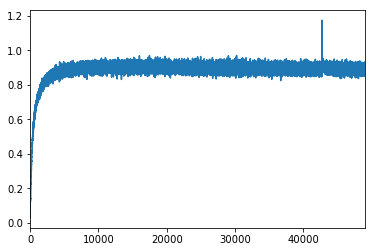

In [165]:
vae_model['kl_loss'].plot()

In [144]:
vae

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,vae,98.2s,40000,8.6737,0.5020,0.8320,0.4453,0.6731,0.8741,0.0749
1,vae,93.9s,80000,7.9692,0.5048,0.8344,0.4725,0.6779,0.8856,0.1412
2,vae,105.7s,120000,7.6277,0.4993,0.8321,0.4492,0.6650,0.8393,0.1062
3,vae,94.6s,160000,7.3316,0.4945,0.8300,0.4993,0.6577,0.7846,0.0817
4,vae,92.5s,200000,7.0482,0.4882,0.8295,0.4963,0.6622,0.8035,0.0230
5,vae,94.8s,240000,6.8268,0.4872,0.8321,0.4816,0.6618,0.8520,-0.0008
6,vae,98.5s,280000,6.6844,0.4898,0.8333,0.4548,0.6656,0.8777,-0.0183
7,vae,95.5s,320000,6.4843,0.4895,0.8337,0.4674,0.6614,0.8737,-0.0324
8,vae,96.1s,360000,6.3381,0.4882,0.8330,0.4856,0.6630,0.8759,-0.0246
9,vae,98.9s,400000,6.1232,0.4900,0.8348,0.4865,0.6619,0.8718,-0.0255


In [173]:
dssm_aae_s_10240 = read("/work/data/logs/new/val/dssm_aae_s_10240_m1_200M_QQ_ml15_limit10240_2018_09_01_07:16:09.res")
dssm_10240 = read("/work/data/logs/new/val/dssm_gru_m1_200M_QQ_ml15_limit10240_2018_09_01_06:39:30.res")

In [181]:
dssm_10240[:5]


,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
dssm_gru,38.1s,10240,0.5669,0.4300,0.5149,0.8474,0.5015,0.7603,0.9279,0.6038
dssm_gru,23.7s,20480,0.5513,0.4184,0.5152,0.8483,0.5082,0.7640,0.9243,0.6114
dssm_gru,25.8s,30720,0.5166,0.4072,0.5156,0.8486,0.5095,0.7620,0.9214,0.6219
dssm_gru,22.2s,40960,0.4963,0.3959,0.5166,0.8490,0.5123,0.7617,0.9204,0.6236
dssm_gru,22.3s,51200,0.4847,0.3862,0.5159,0.8492,0.5077,0.7624,0.9204,0.6298


In [182]:
dssm_aae_s_10240[:5]

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
dssm_aae_s_10240,76.3s,10240,0.6409,0.4741,0.5131,0.8454,0.5310,0.7515,0.9341,0.5434
dssm_aae_s_10240,53.6s,20480,0.6089,0.4291,0.5111,0.8463,0.5266,0.7554,0.9313,0.6026
dssm_aae_s_10240,51.5s,30720,0.5767,0.4000,0.5111,0.8475,0.5334,0.7589,0.9328,0.6245
dssm_aae_s_10240,50.2s,40960,0.5374,0.3803,0.5120,0.8477,0.5335,0.7628,0.9361,0.6356
dssm_aae_s_10240,52.8s,51200,0.5166,0.3630,0.5127,0.8479,0.5450,0.7623,0.9365,0.6505


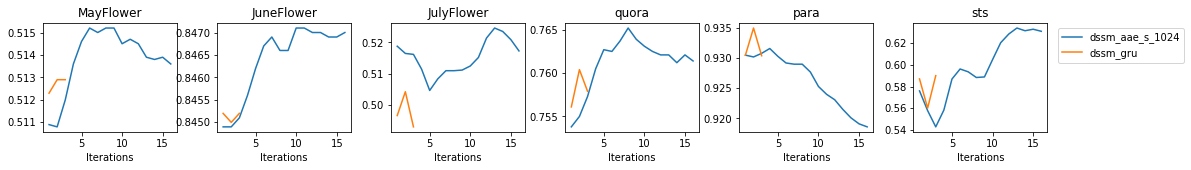

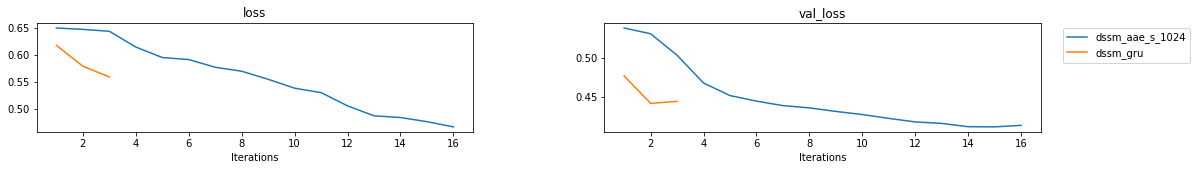

In [300]:
dssm_aae_s_1024 = read2("/work/data/logs/new/all/dssm_aae_s_1024_m1_200M_QQ_ml15_limit1024_2018_09_01_21:02:28.res")
dssm_1024 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit1024_2018_09_01_21:08:55.res")

visualise([dssm_aae_s_1024, dssm_1024])
visualise([dssm_aae_s_1024, dssm_1024], focus=["loss", "val_loss"])

In [301]:
dssm_1024

{'JulyFlower': {0: 0.4967, 1: 0.5043, 2: 0.4931},
 'JuneFlower': {0: 0.8452, 1: 0.845, 2: 0.8452},
 'MayFlower': {0: 0.5123, 1: 0.5129, 2: 0.5129},
 'iter': {0: 1024, 1: 2048, 2: 3072},
 'loss': {0: 0.6173, 1: 0.5791, 2: 0.5593},
 'model': {0: 'dssm_gru', 1: 'dssm_gru', 2: 'dssm_gru'},
 'para': {0: 0.9305, 1: 0.935, 2: 0.9304},
 'quora': {0: 0.7561, 1: 0.7604, 2: 0.7579},
 'sts': {0: 0.587, 1: 0.5602, 2: 0.59},
 'time': {0: '27.1s', 1: '11.9s', 2: '13.6s'},
 'val_loss': {0: 0.4766, 1: 0.4416, 2: 0.4442}}

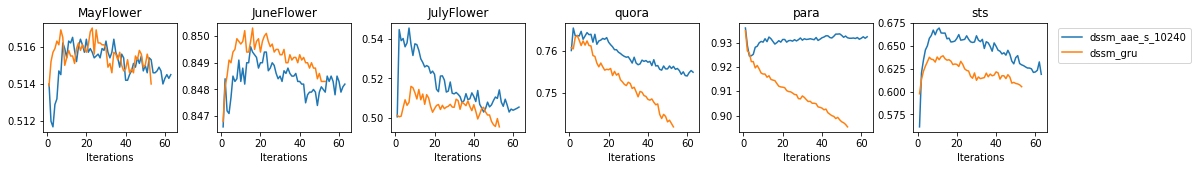

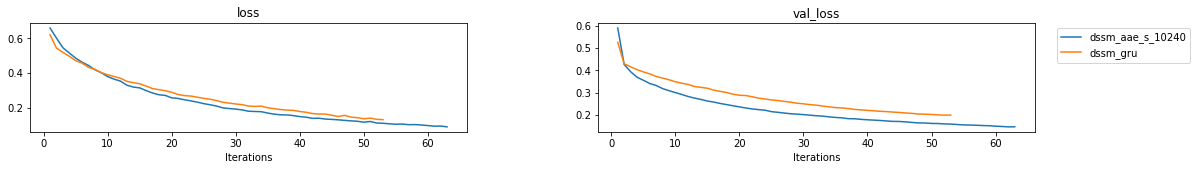

In [299]:
dssm_aae_s_10240 = read2("/work/data/logs/new/all/dssm_aae_s_10240_m1_200M_QQ_ml15_limit10240_2018_09_01_21:13:23.res")
dssm_10240 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit10240_2018_09_01_22:14:04.res")

visualise([dssm_aae_s_10240, dssm_10240])
visualise([dssm_aae_s_10240, dssm_10240], focus=["loss", "val_loss"])

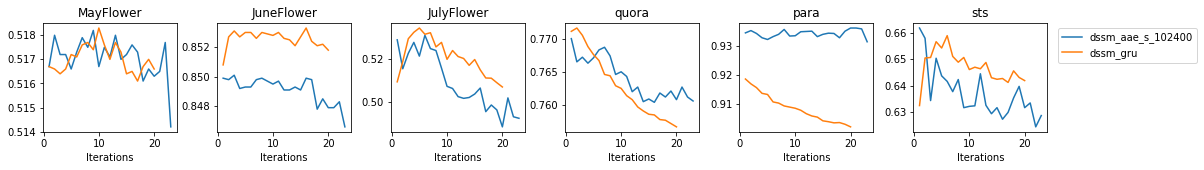

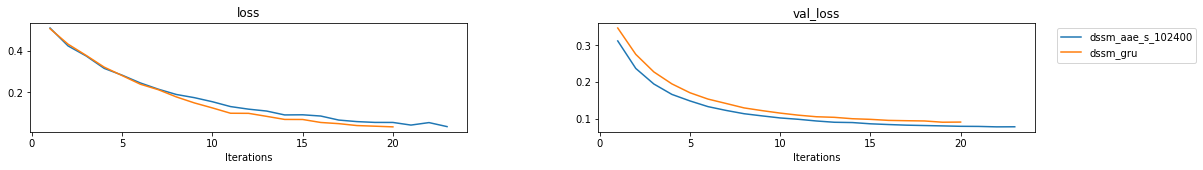

In [359]:
dssm_aae_s_102400 = read2("/work/data/logs/new/all/dssm_aae_s_102400_m1_200M_QQ_ml15_limit102400_2018_09_02_00:02:16.res")
dssm_102400 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit102400_2018_09_02_00:02:14.res")

visualise([dssm_aae_s_102400, dssm_102400])
visualise([dssm_aae_s_102400, dssm_102400], focus=["loss", "val_loss"])